# Procesing big data with Vaex, dataframes and no clusters
### Marco Carranza
### @mcrrnz

In [1]:
# Instalación inicial
# pip install jupyter
# pip install vaex 
# pip install vaex-core vaex-viz vaex-jupyter vaex-arrow vaex-server vaex-ui vaex-hdf5 vaex-astro vaex-distributed


In [2]:
import vaex

### Vaex incorpora un pequeño dataframe de pruebas

In [3]:
demo1 = vaex.example()

In [4]:
demo1

#,E,FeH,L,Lz,random_index,vx,vy,vz,x,y,z
0,-121238.171875,-2.309227609164518,831.0799560546875,-336.426513671875,1511648,53.276722,288.386047,-95.2649078,-0.777470767,2.10626292,1.93743467
1,-100819.9140625,-1.788735491591229,1435.1839599609375,-828.7567749023438,2728665,252.810791,-69.9498444,-56.3121033,3.77427316,2.23387194,3.76209331
2,-100559.9609375,-0.7618109022478798,1039.2989501953125,920.802490234375,1202632,96.276474,226.440201,-34.7527161,1.3757627,-6.3283844,2.63250017
3,-70174.8515625,-1.5208778422936413,2441.724853515625,1183.5899658203125,1020502,204.968842,-205.679016,-58.9777031,-7.06737804,1.31737781,-6.10543537
4,-144138.75,-2.655341358427361,374.8164367675781,-314.5353088378906,3154816,-311.742371,-238.41217,186.824127,0.243441463,-0.822781682,-0.206593871
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",-119687.3203125,-1.6499842518381402,746.8833618164062,-508.96484375,1919483,107.432999,-2.13771296,17.5130272,3.76883793,4.66251659,-4.42904139
"329,996",-68933.8046875,-1.4336036247720836,2395.633056640625,1275.490234375,1064141,32.0,108.089264,179.060638,9.17409325,-8.87091351,-8.61707687
"329,997",-112580.359375,-1.9306227597361942,1182.436279296875,115.58557891845703,374845,8.46711349,-38.2765236,-127.541473,-1.14041007,-8.4957695,2.25749826
"329,998",-74862.90625,-1.225019818838568,1324.5926513671875,1057.017333984375,425745,110.221558,-31.3925591,86.2726822,-14.2985935,-5.51750422,-8.65472317


In [5]:
demo1.describe()

,E,FeH,L,Lz,random_index,vx,vy,vz,x,y,z
dtype,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
count,330000,330000,330000,330000,330000,330000,330000,330000,330000,330000,330000
NA,0,0,0,0,0,0,0,0,0,0,0
mean,-106610.49988610914,-1.6934730008384746,921.3784317993337,-19.039547138733965,1646241.474939394,-0.08480261751936627,2.1091601712652004,1.5943218597493665,-0.06713149126400597,-0.05358986745671381,0.016958244210975013
std,31669.4,0.549376,640.898,742.096,952202,135.461,139.437,110.318,7.31746,7.78605,5.05521
min,-240538,-3.20803,18.3504,-2900.54,0,-585.401,-590.012,-520.235,-128.294,-71.5524,-44.3342
max,44446.8,-0.0173251,3743.66,1789.86,3299975,636.42,619.158,523.647,271.366,146.466,50.7185


## Vaex permite exportar los dataframes directamente a Pandas o a formatos como arrow

In [6]:
pandas_df = demo1[:100].to_pandas_df()

In [7]:
pandas_df

,E,FeH,L,Lz,random_index,vx,vy,vz,x,y,z
0,-121238.171875,-2.309228,831.079956,-336.426514,1511648,53.276722,288.386047,-95.264908,-0.777471,2.106263,1.937435
1,-100819.914062,-1.788735,1435.183960,-828.756775,2728665,252.810791,-69.949844,-56.312103,3.774273,2.233872,3.762093
2,-100559.960938,-0.761811,1039.298950,920.802490,1202632,96.276474,226.440201,-34.752716,1.375763,-6.328384,2.632500
3,-70174.851562,-1.520878,2441.724854,1183.589966,1020502,204.968842,-205.679016,-58.977703,-7.067378,1.317378,-6.105435
4,-144138.750000,-2.655341,374.816437,-314.535309,3154816,-311.742371,-238.412170,186.824127,0.243441,-0.822782,-0.206594
...,...,...,...,...,...,...,...,...,...,...,...
95,-99405.687500,-1.844863,1140.836914,-688.859558,2794373,-102.623138,53.612511,7.555185,-7.804338,-2.635365,-7.472844
96,-154362.171875,-1.867531,169.959824,124.641342,1344431,30.475338,47.794190,-49.444252,3.372185,1.198657,-1.772952
97,-170106.250000,-1.883617,246.862183,164.523392,1330318,191.299561,362.805359,-11.236567,0.470685,0.032639,0.441789
98,-101061.445312,-1.867424,465.265564,238.525650,701908,25.192654,-4.154729,30.725702,8.090986,-10.802415,0.840847


In [8]:
arrow_table = demo1[:100].to_arrow_table()

In [9]:
arrow_table

pyarrow.Table
E: double
FeH: double
L: double
Lz: double
random_index: int64
vx: double
vy: double
vz: double
x: double
y: double
z: double

## Probemos con un dataset un poco más grande 
#### Data del los viajes realizados en Taxi en la ciudad de Nueva York en el 2015 , el archivo de 23 GB en formato .hdf5
####    https://drive.google.com/file/d/0B8gjQokMGa4nTXc0Z3QyYjZBMWc/view?usp=sharing
#### La data completa se puede descarga en CSV (+/- 200GB) desde:
####    https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [10]:
data = 'nyc_taxi2015.hdf5'

In [11]:
df = vaex.open(data)

In [12]:
df.count()

array(146112989)

##### La data se abre case de forma instantanea, a diferencia de Pandas la data no se leer y carga por completo a memoria. 
##### Vaex aprovecha la metadata de los archivos y lee información de la cantidad de registros, columns, tipos de datos, etc. 
##### Esto aplica a los formatos que soportan Memory mapping (apache arrow, parquet, hdf5)

#### Al imprimir el dataframe se leen las primeras 5 y últimas 5 filas

In [13]:
df

#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15 19:23:42.000000000,2015-01-15 19:05:39.000000000,1.59
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10 20:53:28.000000000,2015-01-10 20:33:38.000000000,3.3
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10 20:43:41.000000000,2015-01-10 20:33:38.000000000,1.8
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10 20:35:31.000000000,2015-01-10 20:33:39.000000000,0.5
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10 20:52:58.000000000,2015-01-10 20:33:39.000000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,984",2,4.0,0.0,40.722469329833984,-73.98621368408203,0.5,7.5,0.3,0.5,5,1,3.0,23.0,40.72087097167969,-73.99381256103516,1.76,0.0,10.56,2016-01-01 00:08:18.000000000,2015-12-31 23:59:56.000000000,1.2
"146,112,985",1,4.0,0.0,40.75238800048828,-73.93951416015625,0.5,7.5,0.3,0.5,2,2,3.0,23.0,40.76028060913085,-73.96527099609375,0.0,0.0,8.8,2016-01-01 00:05:19.000000000,2015-12-31 23:59:58.000000000,2.0
"146,112,986",1,4.0,0.0,40.69329833984375,-73.9886703491211,0.5,13.5,0.3,0.5,2,2,3.0,23.0,40.73907852172852,-73.98729705810547,0.0,0.0,14.8,2016-01-01 00:12:55.000000000,2015-12-31 23:59:59.000000000,3.8
"146,112,987",2,4.0,0.0,40.705322265625,-74.01712036132812,0.5,8.5,0.3,0.5,1,2,3.0,23.0,40.72569274902344,-73.99755859375,0.0,0.0,9.8,2016-01-01 00:10:26.000000000,2015-12-31 23:59:59.000000000,1.96


#### Vaex solo revisará todo el conjunto de datos cuando sea necesario, e intentará hacerlo con la menor cantidad posible de datos.

In [14]:
df.describe() # Un resumen de alto nivel del dataset.

,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,...,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,...,float64,float64,float64,float64,float64,float64,float64,datetime64[ns],datetime64[ns],float64
count,146112989,146112989,146112989,143900586,143900582,146112989,146112989,146112986,146112989,146112989,...,146112989,146112989,143807893,143807890,146112989,146112989,146112989,146112989,146112989,146112989
NA,0,0,0,2212403,2212407,0,0,3,0,0,...,0,0,2305096,2305099,0,0,0,0,0,0
mean,1.5246531025383376,3.067174931312917,13.528047879439384,40.75143907701093,-73.97368987799456,0.3142660945085448,12.938776654279149,0.29830882068353426,0.497563631054047,1.6806633597783698,...,3.0632259668577446,13.539967093548405,40.75060057537205,-73.97391430335938,1.7284416932901736,0.30777384000122004,16.09624729019058,1970-01-01T00:01:52.694414946,1970-01-01T00:01:06.416558865,13.137274740509303
std,0.499392,1.95925,6.5567,0.173366,0.326496,0.531459,124.599,0.0260662,0.0500798,1.33337,...,1.95696,6.47347,0.0766572,0.216044,326.837,1.66441,356.994,9.22274e+15,9.08535e+15,19875.1
min,1,0,0,-78.1947,-781.833,-79,-496,-0.3,-3,0,...,0,0,-78.1947,-874.003,-440,-99,-496.3,1899-12-31T23:59:43.370698752,2014-12-31T23:59:54.563395584,-4.08401e+07
max,2,6,23,483.45,172.6,999.99,825999,137.63,91,9,...,6,23,404.867,172.6,3.95059e+06,1901.4,3.95061e+06,2253-08-23T08:00:13.061652480,2016-01-01T00:00:49.632313344,1.98623e+08


#### Vaex es capaz de analizar en un par de minutos el dataset (23GB) en un equipo con pocos recursos (Macbook Air 1,6 GHz Dual-Core Intel Core i5 8 GB). 
#### Hacer lo mismo con Pandas, nos obligaría a tener un equipo con mas de 24GB o usar una instancia cloud.
#### Utilizar herramientas para computación ditribuida requeriría un esfuerzo mucho mayor.

## Columnas Virtuales
### Un Característica muy interesante la la capacidad de tener columnas virtuales que se calculará sobre la marcha
### Esto permite ahorrar mucha memoria cuando los dataset son muy grandes

In [14]:
df['ratio'] = df.tip_amount/df.total_amount

##### En la columna todavía no hace ningún cálculo, solo almacena la expresión para no desperdicia memoria.
##### Sin embargo, la nueva columna se puede usar en los cálculos como si fuera una columna normal.

In [46]:
df['ratio']

Expression = ratio
Length: 144,651,859 dtype: float64 (column)
-------------------------------------------
        0  0.190616
        1   0.11236
        2         0
        3         0
        4         0
        ...        
144651854       0.2
144651855         0
144651856  0.166667
144651857  0.165829
144651858   0.16647

### Bonus

In [39]:
df.set_active_fraction(0.99) # Usamos solo una fración de la data

In [40]:
df.count()

array(144651859)

#### Es facil hacer un grafico para ver outliers
#### Podemos ver cuanto pagó la gente por un viaje y filtrar los viajes por un rango
#### Para ello vaex utiliza matplotlib

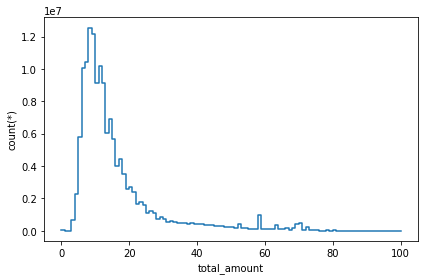

In [41]:
df.plot1d(df.total_amount, shape=100, limits=[0, 100])

In [42]:
df2 = df[(df.total_amount > 5) & (df.total_amount < 40)]

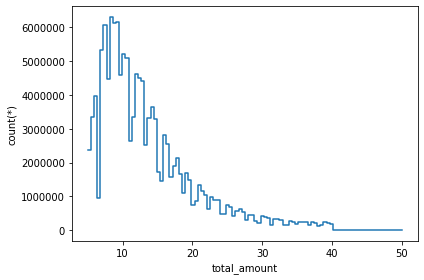

In [43]:
df2.plot1d(df2.total_amount, shape=100, limits=[5, 50])

### Podemos graficar facilmente en funcion a la latitud y la longitud donde se inician más viajes, usando una escala logarítmica.

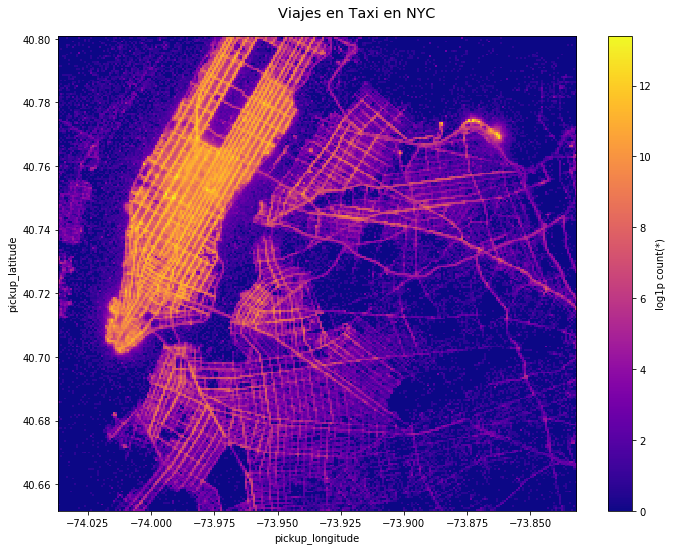

In [54]:
df.plot(df.col.pickup_longitude,
        df.col.pickup_latitude,
        f="log1p",
        show=True,
        limits="96%",
        colormap='plasma',title="Viajes en Taxi en NYC", figsize=(10,8));

### Funciones custom

In [24]:
@vaex.register_function()
def add_100(item):
    return item+100

In [25]:
df

#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,ratio
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15 19:23:42.000000000,2015-01-15 19:05:39.000000000,1.59,0.1906158357771261
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10 20:53:28.000000000,2015-01-10 20:33:38.000000000,3.3,0.11235955056179775
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10 20:43:41.000000000,2015-01-10 20:33:38.000000000,1.8,0.0
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10 20:35:31.000000000,2015-01-10 20:33:39.000000000,0.5,0.0
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10 20:52:58.000000000,2015-01-10 20:33:39.000000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,305,644",2,6.0,3.0,40.740028381347656,-73.9819107055664,0.5,13.0,0.3,0.5,1,1,6.0,3.0,40.77751922607422,-73.9489974975586,1.0,0.0,15.3,2015-01-18 03:40:56.000000000,2015-01-18 03:32:29.000000000,3.91,0.06535947712418301
"7,305,645",2,6.0,3.0,40.68484115600585,-73.99182891845702,0.5,26.5,0.3,0.5,1,1,6.0,3.0,40.762939453125,-73.9828567504883,4.0,0.0,31.8,2015-01-18 03:54:35.000000000,2015-01-18 03:32:29.000000000,8.4,0.12578616352201258
"7,305,646",2,6.0,3.0,40.74525833129883,-73.99239349365234,0.5,6.0,0.3,0.5,1,1,6.0,3.0,40.76018142700195,-73.98428344726562,1.3,0.0,8.6,2015-01-18 03:37:29.000000000,2015-01-18 03:32:32.000000000,1.21,0.15116279069767444
"7,305,647",2,6.0,4.0,40.73992156982422,-73.90463256835938,0.5,25.5,0.3,0.5,1,1,6.0,3.0,40.73789978027344,-74.00816345214845,5.2,0.0,32.0,2015-01-18 04:00:23.000000000,2015-01-18 03:32:32.000000000,7.46,0.1625


In [26]:
df.func.add_100(df.VendorID)


Expression = add_100(VendorID)
Length: 7,305,649 dtype: int64 (expression)
-------------------------------------------
      0  102
      1  101
      2  101
      3  101
      4  101
    ...     
7305644  102
7305645  102
7305646  102
7305647  102
7305648  102